In [2]:
# Instalando o SNScrape, será a ferramenta usada para raspar os dados do Twitter
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importando as bibliotecas
import snscrape.modules.twitter as sntwitter # Será usada para o webscrapping
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator # Será usada para gerar a wordcloud

In [4]:
# Fazendo o webscrapping no twitter e gravando os valores numa lista
tweet_list = []
for tweet in sntwitter.TwitterSearchScraper('investimento since:2022-10-01 until:2022-10-19').get_items():
  tweet_list.append([tweet.username, tweet.date, tweet.content])

In [5]:
# transformando a lista de listas acima num dataframe
tweets = pd.DataFrame(tweet_list, columns = ['username', 'date', 'content'])

In [6]:
# conferindo o tamanho do dataframe
tweets.shape

(39854, 3)

In [7]:
# visualizando o dataframe
tweets.head(10)

username                      date  \
0     j_mocellin 2022-10-18 23:59:06+00:00   
1    Caleb_Roper 2022-10-18 23:59:02+00:00   
2        uwucute 2022-10-18 23:58:50+00:00   
3      DenteLeoa 2022-10-18 23:58:41+00:00   
4    cronicasccp 2022-10-18 23:58:08+00:00   
5  _thaisasiilva 2022-10-18 23:58:06+00:00   
6     Douglas94Z 2022-10-18 23:57:55+00:00   
7    klebresende 2022-10-18 23:57:49+00:00   
8    brparalerdo 2022-10-18 23:56:29+00:00   
9      DiegoFu81 2022-10-18 23:56:19+00:00   

                                             content  
0      @Petrauskinha Foi um investimento, amiga KKKK  
1      @pedrosa Roubar também deve ser investimento.  
2  preciso q alguém me diga q não é um bom invest...  
3  “Saúde e educação não são gastos, são investim...  
4  Jamais diga que “educação não é gasto, educaçã...  
5  Melhor investimento que eu fiz foi o da depila...  
6  @Tirodemeta3 Investidor que não existe, Cotia ...  
7  O maior pico do petróleo no primeiro governo L...  
8  O Doc sobre a Facada será lançado exclusivamen...  
9  @pedrosa O Luladrao investiu tanto em educaçao...

In [8]:
# Para fazer a wordcloud, precisamos juntar todos os tweets em uma só string
# Portanto, estou criando uma nova lista e inserindo todos os tweets nela
words = []
for frase in tweets['content']:
  words.append(frase)

In [9]:
# Unindo todos os tweets numa grande string
words = " ".join(s for s in words).lower()
words

'@petrauskinha foi um investimento, amiga kkkk @pedrosa roubar também deve ser investimento. preciso q alguém me diga q não é um bom investimento “saúde e educação não são gastos, são investimento.” lula 18/10/22 jamais diga que “educação não é gasto, educação é investimento” é frase pronta.\n\né uma ideologia!\n\nse você não entende isso, faz sentido você votar no bolsonaro. melhor investimento que eu fiz foi o da depilação a laser, a cada sensação vejo mais resultado @tirodemeta3 investidor que não existe, cotia é o nosso investidor, é simples vamos parar de pagar altos salários para veteranos, parar de gastar com orejuelas da vida, investimento em alguns jogadores pontuais e colocar a molecada para jogar, fazer boas vendas e baixar a dívida o maior pico do petróleo no primeiro governo lula foi abaixo de 80 dólares o barril. custo de produção e pesquisa eram enormes. gasolina 2,50. petróleo hj tá 90, custo de exploração baixo por conta do investimento feito no governo pt e alguém ain

Stopwords são "palavras inúteis" que toda lingua tem e não há sentido positivo ou negativo no que diz respeito à análise, portanto precisarão ser removidas. Exemplos: a, o, e, para, isso, que e etc.

Existem várias listas já prontas em vários foruns e até função da própria biblioteca wordcloud que já contenham várias stopwords.

Entretanto, preferi fazer manualmente porque talvez tenham palavras que seriam stopwords no contexto em que foram definidas nas listas já prontas que seriam relevantes para este dataset. Por exemplo: caro, cara

In [10]:
# criando uma lista de stopwords baseada na raspagem que fizemos anteriormente.
stopwords = ['de', 'os', 'as', 'o', 'a', 'da', 'do','no', 'na', 'para', 'em', 'ele', 'meu', 'e', 'esta', 'está', 'se', 'ser',
             'ou', 'ai', 'aí', 'https', 'http', 'são', 'sao', 'ao', 'pela', 'essa', 'dessa', 'esse', 'desse', 'nos', 'nós',
             'por', 'já', 'você', 'ainda','porque', 'por que', 'porquê', 'por quê', 'seu', 'das', 'com', 'uma', 'um', 'no',
             'na', 'mais', 'menos', 'não', 'fonte', 'Fonte', 'é', 'após', 'apos','só','também', 'estão', 'aqui', 'todo', 'tudo',
             'todos', 'todas', 'pra', 'me', 'quem','dos', 'q', 'eles', 'elas', 'ele','ela','podem', 'poderão', 'partir', 'mesmo',
             'mesma', 'outro', 'outra', 'apena', 'apenas', 'grande', 'pequeno', 'minha', 'eu', 'sem', 'partir', 'a partir', 'dia',
             'noite', 'veja', 'ma', 'la', 'meio', 'fazer', 'hora', 'te', 'que', 'mil', 'coisa', 'seus', 'qual', 'vem', 'ter',
             'numero', 'número','bem', 'até', 'primeira', 'ate', 'isso', 'aquilo', 'nas', 'olho', 'há', 'ha', 'vai', 'vamo',
             'vamos', 'à', 'entre', 'vc', 'brasileiro', 'qualquer', 'foi', 'primeiro', 'pelo', 'caso', 'aos', 'nem', 'semana',
             'mes', 'mês', 'pelo', 'pela', 'pessoa', 'onde', 'aonde', 'a onde', 'gente', 'nem','aos', 'hoje',  'parte','confira',
             'link', 'meses', 'janeiro', 'fevereiro', 'março', 'marco', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro',
             'outubro', 'novembro', 'dezembro',  'ano', 'anos', 'casa', 'Bom', 'Ruim', 'tenho', 'nosso', 'nossa', 'será', 'este',
             'esse', 'aquele', 'melhor', 'maior', 'menor', 'pior', 'via', 'agora', 'depois', 'antes', 'segue', 'seguir',
             'principais', 'principal', 'sua', 'minha', 'minhas', 'autoriza', 'autorização', 'autorizacao', 'sobre', 'outras',
             'sempre', 'saber', 'focado', 'focados', 'focada', 'focadas', 'lugar', 'lugares', 'pais', 'país', 'pode', 'vou',
             'seja', 'algo', 'parece', 'pena', 'do', 'doz', 'mas', 'mais', 'fica', 'nao', 'for', 'su','sua', 'seu', 'suas',
             'sabe', 'cada', 'tipo', 'lá', 'etc', 'dar', 'tamto', 'quero', 'falando', 'fica', 'sou', 'fiz', 'tá', 'contra',
             'feito', 'pq', 'fala', 'quer', 'vão', 'muito', 'teve', 'time', 'clube', 'boa', 'exemplo', 'seria', 'coisas',
             'muita', 'pouco', 'vcs', 'teve', 'fosse', 'vez', 'temo', 'boa', 'lá', 'per', 'di', 'tão', 'quanto', 'tu', 'sei',
             'você', 'né', 'olha', 'tá', 'tão', 'outros', 'como', 'enquanto', 'dizer', 'nesse', 'tbm', 'ta', 'in', 'mim', 'alguma',
             'r', 'rs', 'k', 'fora', 'pro', 'esses', 'faz', 'sendo', 'temos', 'fim', 'assim', 'nenhum', 'alguém', 'tem', 'desde',
             'era', 'acha', 'estou', 'dela', 'tô', 'então', 'entao', 'ent', 'ir', 'certo', 'errado', 'vocês', 'volta', 'tanto',
             'grupo', 'mal', 'questão', 'questao', 'tinha', 'ficar', 'nova', 'ver', 'apoio', 'causa', 'igual', 'teto', 'falar',
             'dele','eh', 'fez', 'forma', 'sim', 'claro', 'nunca', 'dá', 'paíse', 'un', 'realmente', 'fazendo', 'diz', 'durante',
             'deveria', 'algum', 'estamos', 'existe', 'ninguem', 'alem', 'além', 'con', 'disso', 'num', 'oq', 'o q', 'próximo',
             'proximo', 'deu', 'dois', 'colocar, ']

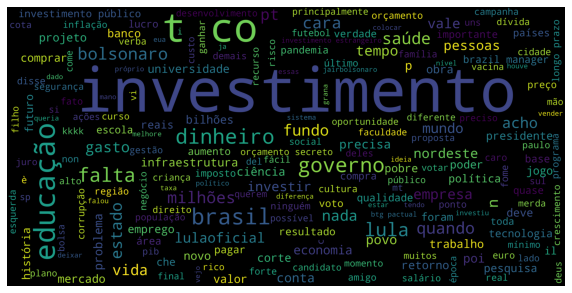

In [11]:
# gerando uma wordcloud
wordcloud = WordCloud(stopwords= stopwords,
                      background_color="black",
                      width=4000,
                      height=2000).generate(words)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() # removendo os eixos da imagem gerada pelo matplotlib
plt.imshow(wordcloud); # mostrando a imagem criada
wordcloud.to_file("investimento_wordcloud.png") # salvando a imagem criada

In [12]:
bitcoin_mask = np.array(Image.open("bitcoin_icon.png"))

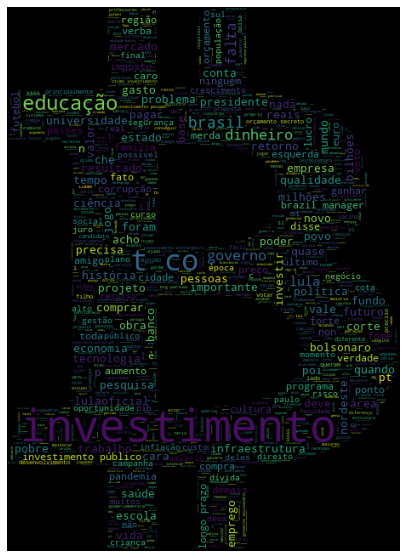

In [13]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000,
                      height=1000,
                      max_words=2000,
                      mask=bitcoin_mask,
                      max_font_size=200,
                      min_font_size=0.5).generate(words)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() # removendo os eixos da imagem gerada pelo matplotlib
plt.imshow(wordcloud) # mostrando a imagem criada
wordcloud.to_file("investimento_wordcloud_masked.png") # salvando a imagem criada